In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import wrds
import pandas_datareader.data as web

def get_factors(factors='CAPM',freq='daily'):   
    
    if freq=='monthly':
        freq_label=''
    else:
        freq_label='_'+freq


    if factors=='CAPM':
        fama_french = web.DataReader("F-F_Research_Data_Factors"+freq_label, "famafrench",start="1921-01-01")
        daily_data = fama_french[0]
    
     
        df_factor = daily_data[['RF','Mkt-RF']] 
    elif factors=='FF3':
        fama_french = web.DataReader("F-F_Research_Data_Factors"+freq_label, "famafrench",start="1921-01-01")
        daily_data = fama_french[0]

        df_factor = daily_data[['RF','Mkt-RF','SMB','HML']]
    elif factors=='FF5':

        fama_french = web.DataReader("F-F_Research_Data_Factors"+freq_label, "famafrench",start="1921-01-01")
        daily_data = fama_french[0]

        df_factor = daily_data[['RF','Mkt-RF','SMB','HML']]
        fama_french2 = web.DataReader("F-F_Research_Data_5_Factors_2x3"+freq_label, "famafrench",start="1921-01-01")
        daily_data2 = fama_french2[0]

        df_factor2 = daily_data2[['RMW','CMA']]
        df_factor=df_factor.merge(df_factor2,on='Date',how='outer')    
        
    else:
        fama_french = web.DataReader("F-F_Research_Data_Factors"+freq_label, "famafrench",start="1921-01-01")
        daily_data = fama_french[0]

        df_factor = daily_data[['RF','Mkt-RF','SMB','HML']]
        fama_french2 = web.DataReader("F-F_Research_Data_5_Factors_2x3"+freq_label, "famafrench",start="1921-01-01")
        daily_data2 = fama_french2[0]

        df_factor2 = daily_data2[['RMW','CMA']]
        df_factor=df_factor.merge(df_factor2,on='Date',how='outer')   
        fama_french = web.DataReader("F-F_Momentum_Factor"+freq_label, "famafrench",start="1921-01-01")
        df_factor=df_factor.merge(fama_french[0],on='Date')
        df_factor.columns=['RF','Mkt-RF','SMB','HML','RMW','CMA','MOM']    
    if freq=='monthly':
        df_factor.index = pd.to_datetime(df_factor.index.to_timestamp())
    else:
        df_factor.index = pd.to_datetime(df_factor.index)
        


    return df_factor/100



# Capital Allocation

How should you allocate capital?

This question can be decomposed in two:

1. How large is my risk portfolio? This comes down to determining how much risk do you want to take
2. How will I split this portfolio across assets

How to approach these questions depend on whether you are investing as principal (i.e. on your behalf) or as a delegate (a manager in a hedge fund)



**1. The Portfolio risk decision**

The benefit of risk-taking is the extra expected return you get relative to the risk-free rate. 
That is true both for a principal and a delegate
You wealth is expected to grow faster (either directly or indirectly trough your performance compensation)

The cost is the "risk". It is important to think exactly what you fear to think about how costly taking on risk is for you

**A. Principal**

* What do you want to do with the money and when?
* How terrible you feel if you have less than you expected
* How much joy would you enjoy if you had more
* Do you have commitments that you absolutely need to satisfy?
    * Minimum retirement income
    * Minimum balance in college fund
    * Minimum budget for health issues
    * Future purchase of a property
* Commitments will push you to take less risk if you currently have enough money to fulfill them 
  * Complete de-risking guarantees you can honor these commitments
* We often talk about someone risk-aversion to describe how painful risk-taking is

**B. Delegate**

*  The delegate certainly has stop loss rule
*  If they lose more than that amount they are forced to liquidate their positions and they are likely to be fired
*  Such stop loss is particularly biding for new managers
*  This stop loss might be explicit:the fund principal literally tells what it is
*  But most likely is implicitly--there is a loss that investors will freak out and pull out
*  You got to think for yourself and have very clearly what the number is
  

**Formalizing their problems**  
* I think is more useful to think in terms of the one-year ahead looses you are comfortable with. 
  * F is the CDF of a standard normal, and $F^{-1}$ is it's quantile function
  * h is a scalar greater than 1 that adjusts for deviation from the normal. 
  * For example h=1.5 will mean that a 3 sigma event is as likely as a 3/h=2 sigma event
    * It is important to always keep in mind that the normal distribution is just an approximation. 
    * But better with it, then without it
  * You pick a probability, $\underline{p}$, 
  * And a maximum loss $\overline{L}$ for  your portfolio in 1 year

$$hF^{-1}(\underline{p})\sigma\geq-\overline{L}$$

Then 
 

$$\sigma\leq-\frac{\overline{L}}{hF^{-1}(\underline{p})}$$

for $\underline{p}=5 \%$, $\overline{L}=30\%$,h=2 what do we get?


In [37]:
from scipy.stats import norm

p=0.05
h=2
L=0.3
sigma=-L/(norm.ppf(p)*h)
sigma

0.09119352478676533

You might want to incorporate your views on the portfolio expected return

That is relevant in case your horizons are one year or longer. 

For horizons that are 1 month or shorter you are safe ignoring the expected value since the volatility totally dominates

Now we write the problem as what fraction of your wealth w, you should invest in this portfolio

the more you invest, the higher the expected growth $w\mu+rf$, but also the higher your wealth volatility $x\sigma$


$$w(hF^{-1}(\underline{p})\sigma+\mu)+rf\geq-\overline{L}$$

to again represent in terms of total vol you choose to take I will rewrite


$$w\sigma(hF^{-1}(\underline{p})+\frac{\mu}{\sigma})+rf\geq-\overline{L}$$

Now note that $F^{-1}(\underline{p})$ is a negative number and $\frac{\mu}{\sigma}$ is positive


Lets first assume $hF^{-1}(\underline{p})+\frac{\mu}{\sigma}<0$ which is the realistic case, unless you are [James Simmons](https://en.wikipedia.org/wiki/Jim_Simons)


$$w\sigma\leq-\frac{\overline{L}+rf}{(hF^{-1}(\underline{p})+\frac{\mu}{\sigma})}$$

- A higher risk-free rate means you can take more vol, since you start from a higher expected baseline
  - It is natural to have a real rate here since you probably care about your purchasing power
- Sharpe Ratio: We call the ratio of the portfolio expected excess return relative to the portfolio volatility, the Sharpe Ratio

$$SR=\frac{E[r]-rf}{\sqrt{Var(r)}}=\frac{E[r^e]}{\sigma}=\frac{\mu}{\sigma}$$

- The higher the Sharpe ratio, the less negative is $hF^{-1}(\underline{p})+\frac{\mu}{\sigma}$ and the higher is the higher the volatility you choose to take

Lets plug some numbers with $rf=1\%$ and SR=0.4 ( that is the market Sharpe ratio)

$$-\frac{0.3+0.01}{2*(-1.64)+0.4}$$

In [38]:


def calculate_sigma(L, h, p,sr,rf):
    return -(L+rf) / (h*norm.ppf(p) +sr)




# Example usage
L = 0.3
h = 2
p = 0.05
rf=0.01
sigma = calculate_sigma(L, h, p,0,rf)
print(sigma)
sigma = calculate_sigma(L, h, p,0.4,rf)
print(sigma)
sigma = calculate_sigma(L, h, p,1,rf)
print(sigma)
print(h*norm.ppf(p))
sigma = calculate_sigma(L, h, p,3.2896,rf)
print(sigma)


0.09423330894632417
0.10727730277221074
0.13538848665984968
-3.2897072539029457
2890.3377078699764


As your SR grows that loss becomes less likely than 5% and the amount of risk that you can take while being 95% sure that you will not lose 30% of your dollars goes to infinity

In this case you can simply adjust your confidence probabilities



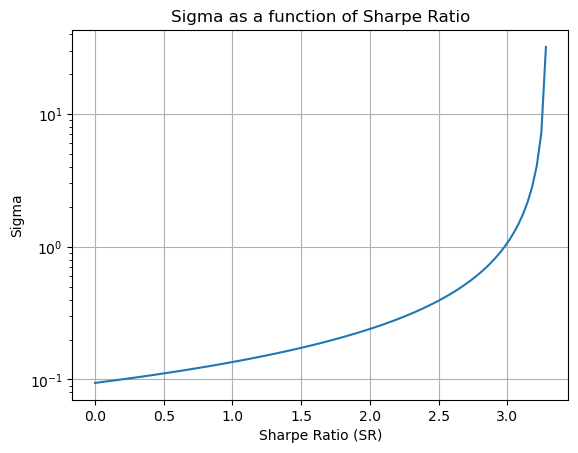

In [39]:
calculate_sigma(L, h, 0.04,3.28,rf)
sr_values = np.linspace(0, 3.28, 100)
sigma_values = [calculate_sigma(L, h, p, sr, rf) for sr in sr_values]

plt.plot(sr_values, sigma_values)
plt.yscale('log')
plt.xlabel('Sharpe Ratio (SR)')
plt.ylabel('Sigma')
plt.title('Sigma as a function of Sharpe Ratio')
plt.grid(True)
plt.show()

* Once you Sharpe Ratio is above 3 (as rare as snow in the winter), risk is unlikely to be the limiting factor
* Wat before then you hit at capacity constraints for your trade since your wealth will be growing so wildly fast
    * For SR=3, your wealth grows at $w\sigma*\frac{\mu}{\sigma}=1*3=300\%$ per year!
  

**2. How to allocate across assets**

Implicit in our discussion is that you have some desired portfolio with some Sharpe ratio $SR_p$ and you are deciding how to invest in it. 

We can already see that having a large Sharpe ratio is a nice thing to have:
 - Increases the growth of your portfolio per unit of risk
 - For the same growth , you need to take less risk
 - Expected growth means you are less likely to have large losses

But you have to have in mind two things
- There might be stronger  deviations from normality for some trading strategies--for example option based strategies
- for some strategies the moments are particularly poorly estimated in short samples--for example option based strategies
- Useful to always check the "realized tail" of your portfolio in a backtest--more on that soon!

How to build a portfolio that maximizes you SR?

>**If you know** the vectors of expected excess returns across your assets and their variance covariance matrix the answer is trivial
> $$W=w E[R^e]\Sigma_{R}^{-1} $$
> This is the MEAN-VARIANCE EFFICIENT PORTFOLIO associated with moments $E[R^e]$,$\Sigma_{R}$
> - $E[R^e]$ is the vector of  expected excess returns across assets
> - $\Sigma_{R}$ is the FORWARD LOOKING variance-covariance matrix
>- w is a scalar that controls the overall volatility of your portfolio, but does not impact the SR

**For this portfolio to implement the optimal Sharpe ratio going forward, we need to use the true moments of the FUTURE distribution of returns**

This portfolio solves the following problems

1. $ \max_W E[W'R^e_T]-\gamma Var(W'R^e_T)$, for $w=\frac{1}{2\gamma}$
2. $ \max_W E[W'R^e_T]~~~subject~~to~~~Var(W'R^e_T)\leq Vmax $, for $w=\sqrt{\frac{Vmax}{E[R^e]\Sigma_{R}^{-1}E[R^e]'}}$
3. $ \min_W Var(W'R^e_T)~~~subject~~to~~~E[W'R^e_T]\geq Emin $, for $w=\frac{Emin}{E[R^e]\Sigma_{R}^{-1}E[R^e]'}$


Lets apply this to  aninternational portfolio allocation problem


In [40]:
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])
Rf=Data['RF']
Data=Data.drop(columns=['RF']).subtract(Data['RF'],axis=0)
Data.head()

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-02-28,-0.0238,-0.004178,0.095922,-0.005073,NaN
1963-03-31,0.0308,0.001042,0.011849,-0.001929,-0.000387
1963-04-30,0.0451,-0.004343,-0.149555,-0.005836,0.005502
1963-05-31,0.0176,-0.004207,-0.014572,-0.002586,0.002289
1963-06-30,-0.0200,-0.000634,-0.057999,-0.013460,0.000839


In [41]:
# lets assume the sample moments are the true moments of the distribution


muR=Data.mean()
display(muR)
SigmaR=Data.cov()
display(SigmaR)
# this inverts the variance covariance matrix
display(np.linalg.inv(SigmaR))
W= np.linalg.inv(SigmaR) @ muR
display(W)

MKT                 0.005140
USA30yearGovBond    0.002523
EmergingMarkets     0.006923
WorldxUSA           0.004149
WorldxUSAGovBond    0.002054
dtype: float64

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
MKT,0.001948,0.000111,0.001292,0.001264,0.000187
USA30yearGovBond,0.000111,0.001227,-0.000204,-0.000013,0.000264
EmergingMarkets,0.001292,-0.000204,0.003556,0.001661,0.000249
WorldxUSA,0.001264,-0.000013,0.001661,0.002182,0.000422
WorldxUSAGovBond,0.000187,0.000264,0.000249,0.000422,0.000407


array([[ 886.9351877 , -163.1566812 , -133.47716321, -463.61463361,
         260.65110274],
       [-163.1566812 , 1029.7603189 ,   83.97391735,  201.95839425,
        -854.35594033],
       [-133.47716321,   83.97391735,  462.95743432, -276.66588761,
          10.81093193],
       [-463.61463361,  201.95839425, -276.66588761, 1113.82507458,
        -904.79801414],
       [ 260.65110274, -854.35594033,   10.81093193, -904.79801414,
        3826.58967227]])

array([ 1.83533361,  1.42337262,  1.60522251, -1.02642088,  3.36582305])

>##### Stop and Think
>- Can you check that applying the little w above it will indeed solve problems 2 and 3?
>- Can you check that the SR of portfolio w*W is invariant to little w?
>- Can you explain mechanically why this is happening?


Lets look at the relationship between expected returns and volatility as we vary the size of the portfolio w, while fixing the allocation W

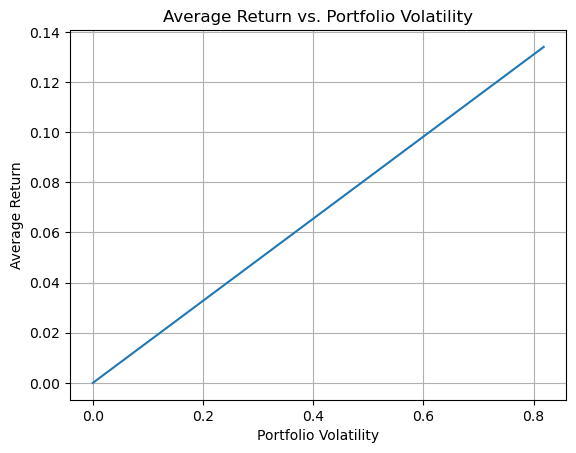

In [42]:
# Define the range of w values
w_values = np.linspace(0, 5, 100)

# Calculate the portfolio returns and volatilities for each w
portfolio_returns = []
portfolio_volatilities = []

for w in w_values:
    weights = w * np.linalg.inv(SigmaR) @ muR
    portfolio_return = weights @ muR
    portfolio_volatility = np.sqrt(weights @ SigmaR @ weights)
    
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)

# Plot the results
plt.plot(portfolio_volatilities, portfolio_returns)
plt.xlabel('Portfolio Volatility')
plt.ylabel('Average Return')
plt.title('Average Return vs. Portfolio Volatility')
plt.grid(True)
plt.show()



What does it mean that the relationship between Expected return and volatility is linear?

Is that what you expect? Is that true in general as you change portfolio weights?

**In reality** knowing the true moments of the return distribution is HARD as we discussed a few classes ago

- Here we used the "In Sample" means and variances
- By construction weight $W=w E[R^e]\Sigma_{R}^{-1} $ will deliver the Highest in sample Sharpe Ratio. It is just math!
- The issue is to what extent these in sample moments are informative about the forward looking moments 
- See the discussion last class


**In reality** your portfolio is not all you care about


It is useful to decompose your allocation in terms of "factor bets" and "alpha bets"

We will now focus on the "alpha" aspect of allocation and revisit factor allocation once we introduce multi-factor models

Most fund managers have tight limits on factor exposures anyways, so factor exposure is more of a consequence of your alpha bets that you need to control rather then a form of investing.


Let's say that you identified N trading strategies

- You believe their alphas are A (N by 1)
- You estimate their factor Betas B (N by 1)
- And their idio variance $\Sigma_{\epsilon}$, which is diagonal. These are idio bets after you remove the factor exposure
- You have a mandate to have zero factor exposure.

What is your optimal portfolio ( we are focusing now on the composition, lets put the level of risk aside) ?
- What is your allocation on each trading strategy?
- Assuming you can trade the factor, how much of it you buy/sell directly?







  


The solution is $w*W$ and $w*W_f$ for any scalar w, where

$W=A\Sigma_{\epsilon}^{=1}$ 

$W_f=-W'\Beta$

and you pick w to control the overall volatility of your portfolio and where
$$A\Sigma_{\epsilon}^{=1}=\left[\alpha_1,\alpha_2,...,\alpha_N\right]\left[\begin{array}{ccc}\sigma^2_{\epsilon,1} & 0 & 0\\0 & \sigma^2_{\epsilon,i} & 0\\0&0&\sigma^2_{\epsilon,N}\end{array}\right]^{-1}=\left[\begin{array}{c}\frac{\alpha_1}{\sigma^2_{\epsilon,1} }\\\frac{\alpha_2}{\sigma^2_{\epsilon,2} }\\...\\\frac{\alpha_N}{\sigma^2_{\epsilon,N} }\end{array}\right]$$


The fact that all the trading strategies are stripped out of the co-movement leads to a really clean formula

You can rewrite in terms of volatility allocations in each strategy

$$W_i\sigma_{\epsilon,i}=\frac{\alpha_i}{\sigma_{\epsilon,i}}$$

We refer to $\frac{\alpha_i}{\sigma{\epsilon,i}}$ as the strategy **Appraisal Ratio**. Sometimes people call this the "information ratio". It is the "sharpe ratio" of the trading strategy striped out of factor exposure

- recall that $\sigma{\epsilon,i}$ is the volatility of the strategy that is long the asset and short the factor in the optimal hedging 

$$r^e_i-h^if=\alpha_i+\beta_i*f+\epsilon_i+hf$$

so if you set $h=-\beta_i$

$$r^e_i-h^if=\alpha_i+\epsilon_i$$

and follows that $E[r^e_i-h^if]=\alpha_i$ and $Var(r^e_i-h^if)=\sigma_{\epsilon,i}^2$

**Bet sizing under uncertainty**

This is the optimal if you are certain of you alphas

But of course you don't really know, so the industry developed many Ad-hoc approaches for **bet sizing**

**Bet sizing** is one of the great skills in a portfolio manager because it requires instinct for uncertainty 

The different Approaches (w is a scalar that controls the overall size of the portfolio )

- **Mean-variance** rule:
  
$$W_i=w \frac{\alpha_i}{\sigma_{\epsilon,i}^2}$$

- **1/N** rule: ignore the magnitude of the alpha and simply bet on the direction of your idea

$$W_i=\frac{1}{N}\left((\alpha_i>0)-(\alpha_i<0)\right)$$

  * this is good if you have goo hunches for mispricing, but you don't get the magnitudes quite right

- **Proportional** rule: Buy/sell proportional to the alpha

$$W_i=w \alpha_i$$

- **Risky-parity** rule: assumes the Appraisal ratio of your different ideas are the same $\frac{\mu_i}{\sigma_i}=\frac{\mu_j}{\sigma_j}$


$$W_i=w \frac{1}{\sigma_{\epsilon,i}}$$


- **Minimum-Variance** rule: you shrink the variance-covariance matrix towards diagonal

$$W_i=w \frac{1}{\sigma_{\epsilon,i}^2}$$

  - This assumes alphas are all the same and focus on using the information in the variance matrix to boost the Sharpe ratio
  

- **Variance shrinkage** rule: you shrink the variance-covariance matrix towards a particular value

$$W_i=w \frac{\alpha_i}{\sigma_{\epsilon,i}^2(1-\tau)+\tau\sigma_{shrink}^2}$$

  - where $\tau\in[0,1]$ is the shrinkage factor


- **Robust-Mean Variance** rule: TBD

there are equivalents of those for the case that covariance matrix is not diagonal as well, for example, if you did not impose a factor model or is doing allocation across factors



- Mean-Variance: $W=\mu\Sigma^{-1}$
- Minimum-Variance: $W =1_N\Sigma^{-1}$
- Variance Shrinkage: $W =\mu(\Sigma(1-\tau)+\tau I\sigma_{shrink}^2)^{-1}$

Some examples you should play with


> ### Stop and Practice
> Solve for optimal weights, maximum Sharpe ratio
> 
> Target vol of 10% annualized
>
> 1. same alpha, same betas, same idio vol
> 2. different alpha, same beta , same idio vol
> 3. same alpha, different betas, same idio vol
> 4. same alpha, same betas, different idio vol


In [43]:
A=np.array([0.3,0.2,0.1,0.05])
B=np.array([1,2,0.5,-0.5])
Sigmae=np.diag([0.4,0.4,0.4,0.4])**2

## Exercise: Investing in characteristic-based factors from the perspective of a CAPM investor

In a few classes we will discuss Multi-factor models and the variety of factors that people in the industry use

Six factors are particularly popular both in the industry and in the academic community

A few of them have ETFS that aim to replicate them, which potentially allow retail investors to get exposure to them cheaply and also industry people to easily hedge their factor exposures. (We will investigate carefully to what extent these ETFs do a good job..coming soon in a theater near you!) 

For now we will use this data to take the perspective of a "CAPM-Investor", i.e. someone that has the market as their risk-factor and see the other factors as non-systematic risk.

>#### Alert
>This will be stylized in the sense that we will use in sample moments, so we cannot really compare Sharpe ratios
>
>Why not? Because by construction the Mean-variance will always beat everyone else.
>
>We use these alternative methods exactly because the in sample moments are often not great guide for the forward looking moments we care about, so a in-sample comparison does not reflect the reality of trading that requires use past information to trade.
>
> We will later discuss how to make this comparison ( it is not rocket science: divide your sample in estimation and testing samples!)


1. We will target Total portfolio with volatility 10%
2. We will get the factors and focus on the sample that we have all the factors available
3. We will estimate out single-factor models for these factors and build our factor model matrixes
4. We will be imposing that the residuals are uncorrelated
   1. This is never true in a particular sample
   2. If you have a good enough factor model, you impose it because whatever correlation is in the sample is noise (it is testable!)
   3. Here this is a toy exercise and these correlations are likely real (for example, mom and HML have shown to be correlated in many different situations)
5. We will the apply the different rules

In [44]:
df_ff6=get_factors('ff6',freq='monthly').dropna()
df_ff6.tail()

c:\Users\alan.moreira\Anaconda3\lib\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)
c:\Users\alan.moreira\Anaconda3\lib\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)
c:\Users\alan.moreira\Anaconda3\lib\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("

,RF,Mkt-RF,SMB,HML,RMW,CMA,MOM
Date,,,,,,,
2024-06-01,0.0041,0.0277,-0.0306,-0.0331,0.0051,-0.0178,0.0090
2024-07-01,0.0045,0.0124,0.0680,0.0574,0.0022,0.0043,-0.0242
2024-08-01,0.0048,0.0161,-0.0355,-0.0113,0.0085,0.0086,0.0479
2024-09-01,0.0040,0.0174,-0.0017,-0.0259,0.0004,-0.0026,-0.0061
2024-10-01,0.0039,-0.0097,-0.0100,0.0089,-0.0140,0.0103,0.0284


In [45]:
import statsmodels.api as sm

# Define the factors and the market factor
factors = ['SMB', 'HML', 'RMW', 'CMA', 'MOM']
market_factor = 'Mkt-RF'

# Initialize lists to store the results
Alpha = []
Beta = []
residuals = []
Alpha_se = []
# Run univariate regressions
for factor in factors:
    X = sm.add_constant(df_ff6[market_factor])
    y = df_ff6[factor]
    model = sm.OLS(y, X).fit()
    Alpha.append(model.params['const'])
    Beta.append(model.params[market_factor])
    residuals.append(model.resid)

# Convert Alpha and Beta to numpy arrays
Alpha = np.array(Alpha)
Beta = np.array(Beta)

# Calculate the variance-covariance matrix of the residuals
#under the assumption that the residuals are uncorrelated ( they are not!)

residuals_matrix = np.vstack(residuals).T
Sigma_e = np.diag(np.diag(np.cov(residuals_matrix.T)))

# Display the results
print("Alpha:", Alpha*12)
print("Beta:", Beta)
print("Sigma_e:", Sigma_e*12)

Alpha: [0.00565215 0.04340806 0.04082549 0.04305824 0.08436363]
Beta: [ 0.20050922 -0.13683445 -0.09207115 -0.16721034 -0.15908574]
Sigma_e: [[0.01021508 0.         0.         0.         0.        ]
 [0.         0.01032402 0.         0.         0.        ]
 [0.         0.         0.00568877 0.         0.        ]
 [0.         0.         0.         0.00447947 0.        ]
 [0.         0.         0.         0.         0.02053454]]


Mean Variance


In [46]:
VolTarget=0.3/12**0.5 # making it monthly as the data
W=Alpha@np.linalg.inv(Sigma_e)
print(W)
# optimal RELATIVE weights, need to calibrate the volatility
# compute the variance of the W portoflio
VarW=0
print(VarW)
#adjusting the weights to meet the volatility target
w= 0
print(w)
# Ww is our final weights with the volatility target
Ww=w*W
# final weights
print(Ww)

# check vol (must be 30%)

vol=0

# market exposure

Portfolio_beta=0

# amount to buy in the market to hedge it completely
h=-Portfolio_beta

AppraisalRatio=0

print(f"your volatility is {vol}")
print(f"Your Appraisal Ratio is {AppraisalRatio}")
print(f"So your optimal portfolio with market neutral exposure is \n {Ww[0]} in SMB, {Ww[1]} in HML, {Ww[2]} in RMW, {Ww[3]} in CMA, {Ww[4]} in MOM, and {h} in Mkt-RF")



[0.55331369 4.20457037 7.17650844 9.61235121 4.10837625]
0
0
[0. 0. 0. 0. 0.]
your volatility is 0
Your Appraisal Ratio is 0
So your optimal portfolio with market neutral exposure is 
 0.0 in SMB, 0.0 in HML, 0.0 in RMW, 0.0 in CMA, 0.0 in MOM, and 0 in Mkt-RF


In [47]:
# lets wrap it up in a function

def sizing(W,Alpha,Sigma_e,Beta,VolTarget=0.3/12**0.5):
    VarW=0
    #adjusting the weights to meet the volatility target
    w= 0
    Ww=w*W
    vol=0
    print(f"your volatility is {vol}")
    Portfolio_beta=0
    h=-Portfolio_beta
    AppraisalRatio=0
    print(f"So your optimal portfolio with market neutral exposure is \n {Ww[0]} in SMB, {Ww[1]} in HML, {Ww[2]} in RMW, {Ww[3]} in CMA, {Ww[4]} in MOM, and {h} in Mkt-RF")
    print(f"Your Appraisal Ratio is {AppraisalRatio}")
    return AppraisalRatio, Ww

W=Alpha@np.linalg.inv(Sigma_e)
sr_alpha,W_alpha=sizing(W,Alpha,Sigma_e,Beta)

your volatility is 0
So your optimal portfolio with market neutral exposure is 
 0.0 in SMB, 0.0 in HML, 0.0 in RMW, 0.0 in CMA, 0.0 in MOM, and 0 in Mkt-RF
Your Appraisal Ratio is 0


1/N rule

In [48]:
W=np.ones(5)/5
sr_alpha,W_alpha=sizing(W,Alpha,Sigma_e,Beta)

your volatility is 0
So your optimal portfolio with market neutral exposure is 
 0.0 in SMB, 0.0 in HML, 0.0 in RMW, 0.0 in CMA, 0.0 in MOM, and 0 in Mkt-RF
Your Appraisal Ratio is 0


Proportional rule

In [49]:
W=Alpha
sr_alpha,W_alpha=sizing(W,Alpha,Sigma_e,Beta)

your volatility is 0
So your optimal portfolio with market neutral exposure is 
 0.0 in SMB, 0.0 in HML, 0.0 in RMW, 0.0 in CMA, 0.0 in MOM, and 0 in Mkt-RF
Your Appraisal Ratio is 0


Risky Parity rule

In [50]:
W=np.ones(5)@np.linalg.inv(Sigma_e**0.5)
sr_alpha,W_alpha=sizing(W,Alpha,Sigma_e,Beta)

your volatility is 0
So your optimal portfolio with market neutral exposure is 
 0.0 in SMB, 0.0 in HML, 0.0 in RMW, 0.0 in CMA, 0.0 in MOM, and 0 in Mkt-RF
Your Appraisal Ratio is 0


Minimum Variance rule

In [51]:
W=np.ones(5)@np.linalg.inv(Sigma_e)
sr_alpha,W_alpha=sizing(W,Alpha,Sigma_e,Beta)

your volatility is 0
So your optimal portfolio with market neutral exposure is 
 0.0 in SMB, 0.0 in HML, 0.0 in RMW, 0.0 in CMA, 0.0 in MOM, and 0 in Mkt-RF
Your Appraisal Ratio is 0


Variance Shrinkage rule


- I will shrink them to the the average vol
- I will shrink by 50%
- The idea makes sense when you think the different assets are kind of similar so you think a good chunk of the sample variation is noise

In [52]:
tau=0.5
sigma_alpha=np.mean(Alpha_se)
Sigma=Sigma_e*(1-tau)+tau*np.eye(5)*np.mean(np.diag(Sigma_e))
W=Alpha@np.linalg.inv(Sigma)
sr_alpha,W_alpha=sizing(W,Alpha,Sigma_e,Beta)

your volatility is 0
So your optimal portfolio with market neutral exposure is 
 0.0 in SMB, 0.0 in HML, 0.0 in RMW, 0.0 in CMA, 0.0 in MOM, and 0 in Mkt-RF
Your Appraisal Ratio is 0


c:\Users\alan.moreira\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alan.moreira\Anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


**How to Combine the  Hedged portfolio (alpha) and the Market (beta)**

- If you see you investment in the factor as simply a financial issue
  - you care exclusively about the returns of the portfolio
  - Do not care how the factor (i.e. the market) might co-move with your non-financial wealth
  
- Then it is basically the same as with the alphas...
- Recall our formula for the mean-variance efficient weights

$$W^*= Var(R^e)^{-1}E[R^e]$$

- Now this becomes really simple because the covariance of the new Hedged-MVE strategy is zero with the market

$$Var(R^e)=\left[\begin{array}{cc} \sigma^2(R_{MKT}^e) & 0\\0 & \sigma^2(R_{Hedged,i})\end{array}\right]$$

- So the optimal weights are just

$$W^* = \left[\begin{array}{c} \frac{E[R^e_{MKT}]}{\sigma^2(R_{MKT}^e)} \\ \frac{\alpha}{\sigma^2(R_{Hedged,i})}\end{array}\right]$$


- You invest in each strategy according to the strength of the risk-return trade-off in the strategy

- Note that anything that invest proportionally in those two assets will still be tangency, i.e. if $W^*$ is tangency $0.3*W^*$ is tangency as well!

- But how much you invest overall will depend on how much risk you want to take

- Of course similar uncertainty issues might push you to deviate from this rule!


> What is the optimal combination between your alpha combo portfolio and the market?

> By how much can you increase your portfolio Sharpe ratio if you combine optimally combine two uncorrelated portfolios? 

- for any two strategies A and B that have **zero correlation** with each other, you can find the maximum achievable Sharpe Ratio with the simple formula 

$$SR_{final}=\sqrt{SR_{A}^2+SR_{B}^2}$$

- The Hedged and the market are orthogonal by construction--> we took out any beta exposure the asset might have!


$$SR_{final}=\sqrt{SR_{MKT}^2+SR_{Hedged}^2}$$


## The rise of "pod shops"


Hedge funds used to be associated with Principal traders

- George Soros
- Julian Robertson
- David Tepper
- Paul Tudor Jones
- Steve Cohen
- John Paulson


Now we have the rise of Citadel and Millenium among a few others

Pod shops are organized totally different

Idea generation are done at the pod level in groups of 5-10 people

Capital is allocated to the pod by the hedge fund principal, who monitors exposures and hedges residual factor risk

Why pod traders work for Citadel and not choose to manager their own fund?

**A calculation**

Consider a pod shop with N pods with SR sr and total vol $\sigma$, what is their alpha? What is their SR?


$$E[\sum x^*_ir_i]=E[\sum \frac{\alpha_i}{\sigma^2_i}\alpha_i]=N*sr^2$$


$$Var[\sum x^*_ir_i]=Var[\sum \frac{\alpha_i}{\sigma^2_i}\epsilon_i]=\sum (\frac{\alpha_i}{\sigma^2_i})^2Var[\epsilon_i]$$


$$Var[\sum x^*_ir_i]=\sum (\frac{\alpha_i}{\sigma^2_i})^2\sigma^2_i=N sr^2$$

so the standard deviation of the pool of pods is 

$$sr_{pool}=\frac{Nsr_{pod}^2}{\sqrt{N}sr_{pod}}=\sqrt{N}sr_{pod}$$

The Sharpe ratio of the pool of pods grows with the number of pods

This means that if managed individually, the average pod will accumulate wealth at rate $\sigma*sr$

But if managed in a pool structure, the average pod will accumulate as $\sqrt{N}\sigma*sr$

find a new uncorrelated idea is super valuable!

The marginal change in cash flows are


$$\frac{\sigma*sr_{pool}}{N}$$

- decreases in the number of pods
- But always positive--if indeed similar SR and uncorrelated!

Note that is Under-estimates the value of the pod structure

 - The higher your Sharpe ratio, the more volatility you can take without bearing significant risk of loss (wealth jsut grows too quickly)

But it also not realistic
  - Your marginal pod is likely to be worse or correlated with the others





## Capital Allocation with Time-varying volatility



While detecting alpha/risk-premia variation of a strategy in real time is nearly impossible, we learned a few classes ago that we can detect volatility variation really well.

Also keeping the risky profile from changing too much is also very desirable for most managers as you though long and deep about how much vol you want. If volatility spikes it suddenly way more likely that you will hit that loss you are fearful of



These ideas together imply that you probably can do better by taking into account the variation in volatility when you size your portfolios.

>### Important
>The crucial necessary condition for this to work is that there is no time-series relationship between alphas and vols
>
>$$cov(\alpha_{i,t},\sigma^2_{i,t})=0$$
>This is key. Might or might not be true. But tends to be true.
>This only works if the alpha/premium is positive to begin with
>If Sharpe ratio is zero, you can't increase it by managing risk!


(here the t subscript denote the distribution of returns for date t+1 as of date t when I make the portfolio allocation)


This is true for example in case alpha is constant, or a the very least, you cannot predict variation in it.

Then your optimal portfolio allocation becomes $w_i=\frac{\alpha_i}{\sigma_{i,t}^2}$


So the Sharpe ratio is

$$SR_{\sigma}=\frac{E[x_{i,t}r_{i,t+1}]}{\sqrt{Var(x_{i,t}r_{i,t+1})}}$$



$$SR_{\sigma}=\frac{E[\frac{\alpha_i}{\sigma_{i,t}^2}r_{i,t+1}]}{\sqrt{Var(\frac{\alpha_i}{\sigma_{i,t}^2}r_{i,t+1})}}$$


After some manipulation it implies

$$SR_{\sigma}=SR\sqrt{E[\sigma_{i,t}^2]E\left[\frac{1}{\sigma_{i,t}^2}\right]}$$

In general $SR_{\sigma}>SR$ because of jensen inequality ($E[F(x)]\geq F(E[X])$ if F is  convex)

to get some clean closed formulas lets assume

$\sigma_{t}^2=\sigma^2 e^{\epsilon-\frac{1}{2}\sigma^2_{\sigma}}$, with $\epsilon\sim N(0,\sigma^2_{\sigma})$

which satisfied $E[\sigma_t]=\sigma$


$$SR_{\sigma}=SR*e^{\frac{1}{4}\sigma^2_{\sigma}}$$

The more volatility variation you can predict, higher $\sigma_{\sigma}$, the higher the boost in you Sharpe ratio

> ### Note
>If Alphas are time-varying but Sharpe ratios are constant, i.e. $\alpha_{i,t}=k\sigma_{i,t}$, then the optimal allocation becomes proportion to inverse volatility $w_i=\frac{\alpha_i}{\sigma_{i,t}}$. What do you get in this case?




## Volatility managing the market


   
 

>ALAN MOREIRA, TYLER MUIR, Volatility-Managed Portfolios, Journal of Finance, August 2017
https://doi.org/10.1111/jofi.12513 
>
>Show that this logic works for the market and many other factors. Since then a huge literature has emerged showing that volatility managing is a great way to boost Sharpe Ratios

The construct portfolios

$$x_t=c\frac{E[r^e_{t+1}]}{Var_t(r^e_{t+1})}$$


The key is to construct a good measure for $ Var_t(r^e_{t+1})$

* there are many things that you can do here (see our discussion in the estimation class)
* We will do something simple and use past vol as a proxy for future vol
* Of course whether isa good proxy or not depends of how it plays out in the data
* But as we saw there is tons of volatility clustering so it is likely a good proxy even if not perfect

* Using daily data for month t, construct the market return "realized variance" during month t
   
   $$rv_t=\sum_{d \in days~ in ~month ~t}\frac{(r_d- \overline{r})^2}{N_{days}},$$
   
 where $\overline{r}$ is the average return within the month

We will need daily data to do this

In [54]:
df_factor = get_factors()


c:\Users\alan.moreira\Anaconda3\lib\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)


### **Constructing monthly realized variance from daily data**


You basically use pandas time series function that shifts all dates to the end of the month, so this way you are technically grouping by the end of the month day.

Now  I use groupby `endofmonth` to put  all returns of given "year-month" pair together (i.e. with the same date)

So I can just compute the variance of this group (say 1/1/2020,1/2/2020,...1/31/2020) will all be 1/31/2020

This will return the daily variance in that month

If I multiply by the average number of trading days I get the monthly realized variance

To be more precise I will simply sum the square deviations of the mean (what this adjusts for?)

,RV
Date,
1926-07-31,0.000492
1926-08-31,0.000878
1926-09-30,0.000565
1926-10-31,0.001689
1926-11-30,0.000336


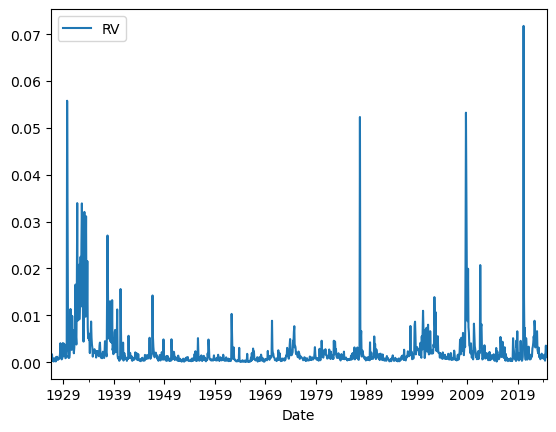

In [55]:
from pandas.tseries.offsets import MonthEnd
endofmonth=df_factor.index+MonthEnd(0)
RV=df_factor[['Mkt-RF']].groupby(endofmonth).apply(lambda x: ((x-x.mean())**2).sum())
# rename column to clarify
RV=RV.rename(columns={'Mkt-RF':'RV'})
RV.plot()
RV.head()

Note how clustered volatility is

If variance was high this month, probably will be high next month too

You certainly can do better

In [56]:
# aggregate daily returns to monthly returns
Ret=(1+df_factor).groupby(endofmonth).prod()-1
# rename columns to clarify
# Merge Ret (monthly return) with RV (realized variance and weights)
df=RV.merge(Ret,how='left',left_index=True,right_index=True)
# construct excess returns

# lag RV by one month
df['RV_lag']=df['RV'].shift(1)

df.mean()

RV        0.002429
RF        0.002686
Mkt-RF    0.006849
RV_lag    0.002431
dtype: float64

C:\Users\alan.moreira\AppData\Local\Temp\ipykernel_17888\1968402388.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_means = df.groupby('Quantile').mean()
C:\Users\alan.moreira\AppData\Local\Temp\ipykernel_17888\1968402388.py:8: RuntimeWarning: invalid value encountered in scalar power
  quantile_means.index = quantile_means.index.map(lambda x: round((x.left*12)**0.5, 2))


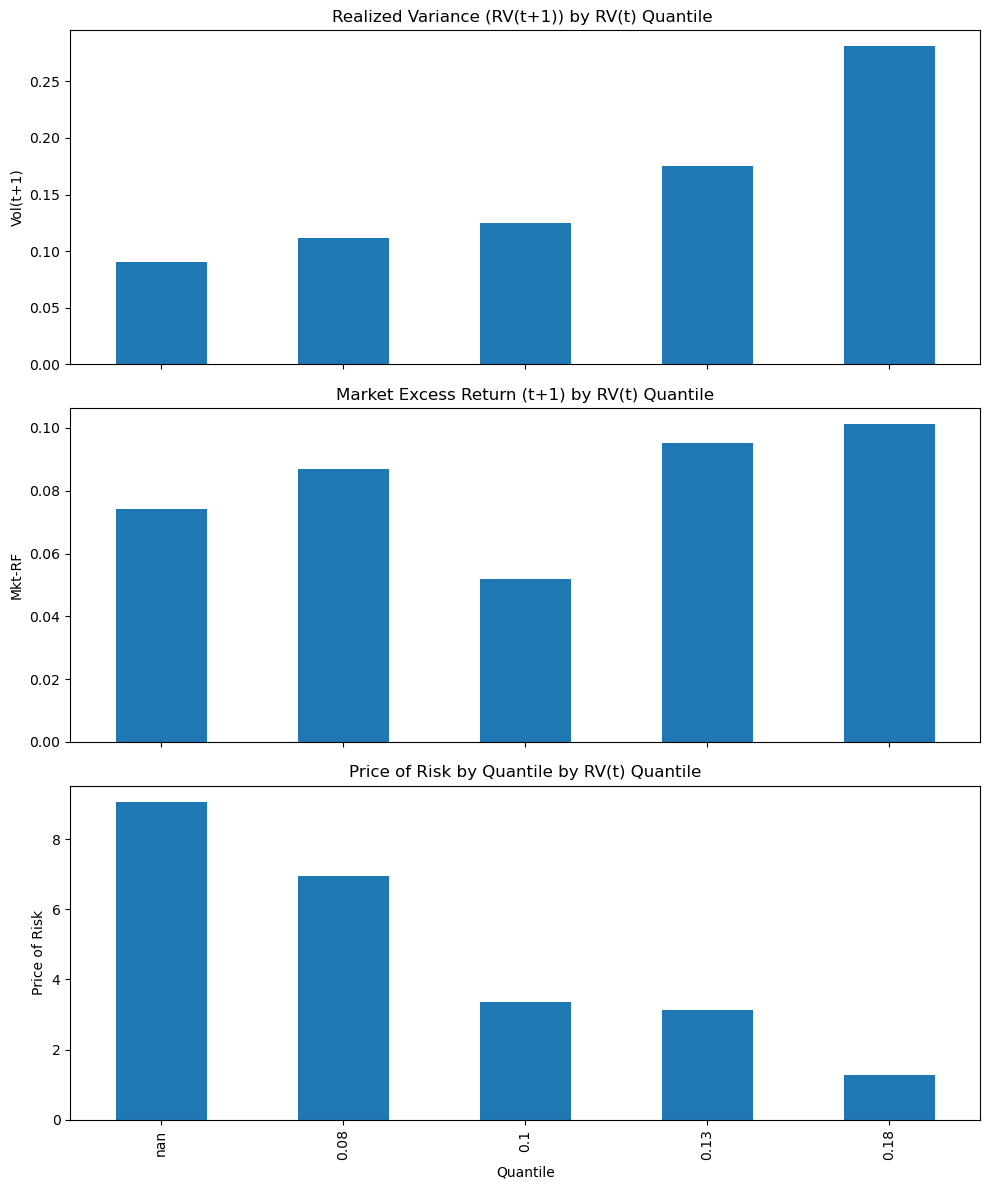

In [57]:




# Create quantile groups based on the RV variable


df['Quantile'] = pd.qcut(df['RV_lag'], q=5)

# Group by quantile and calculate the mean for each column
quantile_means = df.groupby('Quantile').mean()
quantile_means.index = quantile_means.index.map(lambda x: round((x.left*12)**0.5, 2))


quantile_means ['priceofrisk']=quantile_means['Mkt-RF']/(quantile_means['RV'])


# Display the mean of quantiles for each column

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
((quantile_means.RV*12)**0.5).plot(kind='bar', ax=axs[0])
axs[0].set_title('Realized Variance (RV(t+1)) by RV(t) Quantile ')
axs[0].set_ylabel('Vol(t+1)')

(quantile_means['Mkt-RF']*12).plot(kind='bar', ax=axs[1])
axs[1].set_title('Market Excess Return (t+1) by RV(t) Quantile')
axs[1].set_ylabel('Mkt-RF')

quantile_means.priceofrisk.plot(kind='bar', ax=axs[2])
axs[2].set_title('Price of Risk by Quantile by RV(t) Quantile')
axs[2].set_ylabel('Price of Risk')
axs[2].set_xlabel('Quantile')

plt.tight_layout()
plt.show()


We see that following months of high variance--on the right-- you don't really get higher returns

if you focus on the ratio -- the price of risk

$$E[\frac{r^e_{t+1}}{RV_{t+1}(r^e)}|RV_t]$$

you see that it is massively decreasing with variance

Average returns are not constant--**but are close to**-- 

so the natural strategy to exploit this pattern is to lever up when vol is low and reduce exposure when vol is high.

Specifically we Buy the market at the closing price of month t according to the rule:
   
   $$w_t=\frac{c}{rv_t},$$

If W<1, invest in the risk-free rate, if w>1, borrow to fund a bigger position
   
where $c$ is some constant.
   
  * Hold the position for a month
  
  * The returns of the strategy are given by
  
  

 
  $$ r^{VolTiming}_{t+1}=r_{f,t+1}+\frac{c}{rv_t}r^{MKT-RF}_{t+1}$$



### **From signal to weights**

* weight on the market:

$$x_t=c\frac{1}{rv_t}$$

* weight on the risk-free rate: $1-x_t$

* $c$ controls how levered is the strategy on average.

* As we saw before all timing strategies involved some in and out of the market, but you also need to determine the average position. That is the role of $c$.

* There are many ways to choose c

* while c does not impact the strategy Sharpe Ratio, it impacts the amount of leverage that the strategy will take

* Here lets keep it simple and simply choose it so that the position on the market is 1 on average

$$E[x_t]=E[c\frac{1}{rv_t}]=1$$

implies $c=\frac{1}{E[\frac{1}{rv_t}]}$


1.0

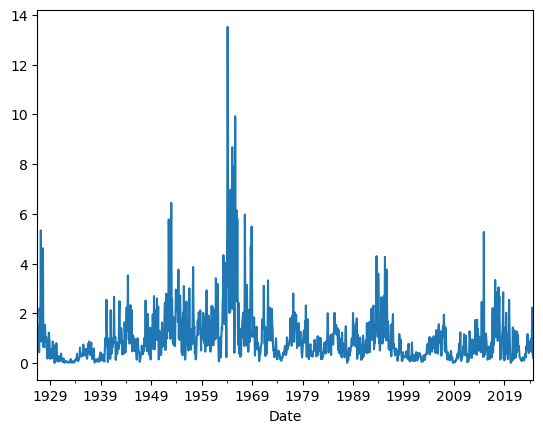

In [60]:

df['Weight']=1/df.RV_lag
c=1/df['Weight'].mean()
df['Weight']=c*df['Weight']
df.Weight.plot()
df.Weight.mean()

You see that leverage gets really high. 

As high as 10!

You can see that in your position in the risk-free rate which exactly mirrors that



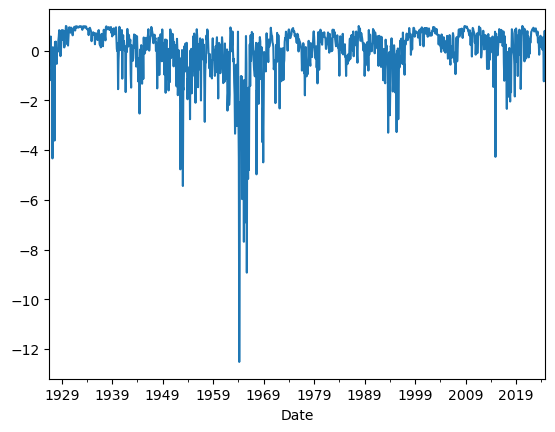

In [61]:
# plot the weights on the risk-free rate
(1-df.Weight).plot()
plt.show()

### **Construct strategy returns**



* Now to construct the strategy return recall that we use the relaized variance in month t to buy the market at the closing of month t and earn the return accrued in month t+1


* I will call the strategy as $\textbf{VMS}$ (Volatility Managed Strategy)

In [62]:
# now construct the return of the strategy
df['VMS']=df.Weight*df['Mkt-RF']

We can see the cumulative returns of the market and the volatility managed strategy

<Axes: xlabel='Date'>

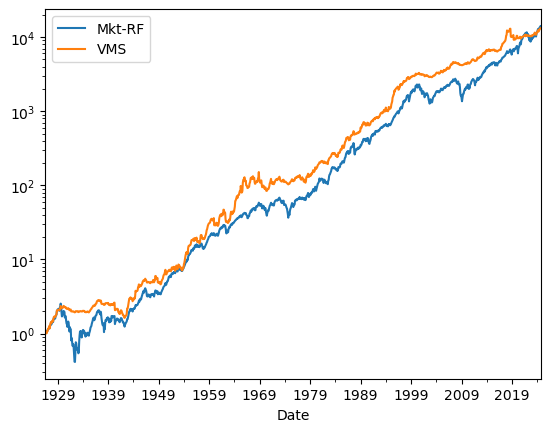

In [63]:
df[['Mkt-RF','VMS']].add(df['RF']+1,axis=0).cumprod().plot(logy=True)

**Sharpe ratio**

The VMS strategy ends up with a 20% higher Sharpe Ratio

In [64]:
(df[['Mkt-RF','VMS']].mean()/df[['Mkt-RF','VMS']].std())*12**0.5

Mkt-RF    0.445526
VMS       0.514105
dtype: float64

**Tail risk**

The VMS bears substantially less tail risk as well

We can look at the the percentile 0.5% of the return distribution

In [65]:
df[['Mkt-RF','VMS']].quantile(q=0.005)

Mkt-RF   -0.181863
VMS      -0.139248
Name: 0.005, dtype: float64

**Things to try**


- How well it works with VIX instead of RV?
- What If we use a forecasting model to predict variance?
- How well it works with standard deviation instead of variance
- How well it works if we put leverage limits
- How well it works if we combine an expected return signal with the volatility signal?

In [66]:
def volmanaged(df):
    factor=df.name
    df=df.dropna()
    endofmonth=df.index+MonthEnd(0)

    # signal constuctioon
    Signal=df.groupby(endofmonth).apply(lambda x: ((x-x.mean())**2).sum())
    Signal=1/Signal.shift(1)
    Signal.name='signal'

    # compute returns for the month
    Ret=(1+df).groupby(endofmonth).prod()-1
   
    # Merge Ret (monthly return) with RV (realized variance and weights)
    df=pd.DataFrame(Signal).merge(Ret,how='left',left_index=True,right_index=True)


    df['Weight']=df.signal
    # Normalize the weight so it is on average 1
    df['Weight']=df['Weight']/df['Weight'].mean()
    df[factor+'_volmanaged']=df.Weight*df[factor]
    # annualized Sharpe ratio
    SR=(df[[factor,factor+'_volmanaged']].mean()/df[[factor,factor+'_volmanaged']].std())*12**0.5
    # tail risk
    TR=df[[factor,factor+'_volmanaged']].quantile(q=0.005)
    return SR,TR,df


volmanaged(df_factor['Mkt-RF'])    

(Mkt-RF               0.445526
 Mkt-RF_volmanaged    0.514105
 dtype: float64,
 Mkt-RF              -0.181863
 Mkt-RF_volmanaged   -0.139248
 Name: 0.005, dtype: float64,
                  signal    Mkt-RF    Weight  Mkt-RF_volmanaged
 Date                                                          
 1926-07-31          NaN  0.028846       NaN                NaN
 1926-08-31  2032.427792  0.026697  1.497461           0.039977
 1926-09-30  1138.958151  0.003724  0.839167           0.003125
 1926-10-31  1770.057704 -0.033011  1.304151          -0.043051
 1926-11-30   592.073883  0.025847  0.436231           0.011275
 ...                 ...       ...       ...                ...
 2024-06-30  1314.346208  0.027796  0.968390           0.026917
 2024-07-31  3035.939128  0.011986  2.236833           0.026810
 2024-08-31   569.108972  0.015949  0.419311           0.006687
 2024-09-30   283.257232  0.017348  0.208700           0.003620
 2024-10-31   633.015560 -0.009699  0.466396          -0.0045

## Takeaways

1. Know the maximum loss you can bear--> figure out how much vol you should have in your portfolio
2. Portfolio composition is all about the Sharpe Ratio
3. Diversification is your friend, estimation uncertainty your mortal enemy
4. Many approaches to sizing--but better to keep it simple and iterate relentlessly (more on that next)
5. Risk-Management is key
   - Hedging out factor exposure enhances you Sharpe Ratio. A safer strategy enables more risk-taking, and more growth
   - Dynamic management of risk does the same across time. You take more risk, when compensation is high